In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Understanding and Exploration

In [2]:
df = pd.read_csv('D:/Users/dell1/Desktop/CERTIFICATES/Deep learning/SOM/P16-Self-Organizing-Maps/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [3]:
#Checking the first 5 rows
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
#Checking the shape
df.shape

(690, 16)

In [5]:
#checking the information about the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


* From the data, we can conclude that A1, A4, A5, A6, A8, A9, A11, A12 and Class column datatype should be categorical. so we need ti change the data type.

# Data Cleaning and Analysis

In [6]:
#Checking the missing values
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

There are no missing values in the dataset.

In [7]:
#Converting the datatype to category for categorical variable
df['A1'] = df['A1'].astype("category")
df['A4'] = df['A4'].astype("category")
df['A5'] = df['A5'].astype("category")
df['A6'] = df['A6'].astype("category")
df['A8'] = df['A8'].astype("category")
df['A9'] = df['A9'].astype("category")
df['A11'] = df['A11'].astype("category")
df['A12'] = df['A12'].astype("category")
df['Class'] = df['Class'].astype("category")

In [8]:
#Dropping CustomerID column as it is not relevent for the analysis
df = df.drop('CustomerID',axis=1)

In [9]:
#Checking the summary of the data
df.describe()

,A2,A3,A7,A10,A13,A14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000


In [10]:
#Checking the distribution of categorical variable
cols = df.select_dtypes('category').columns
def bar_charts(data):
    ncol = 3
    nrow = (len(cols)//ncol)+1
    plt.figure(figsize=(20,15))
    for col, n in zip(cols, np.arange(len(cols))):
        
        ax = plt.subplot(nrow, ncol, n+1)
        sns.countplot(x=data[col])

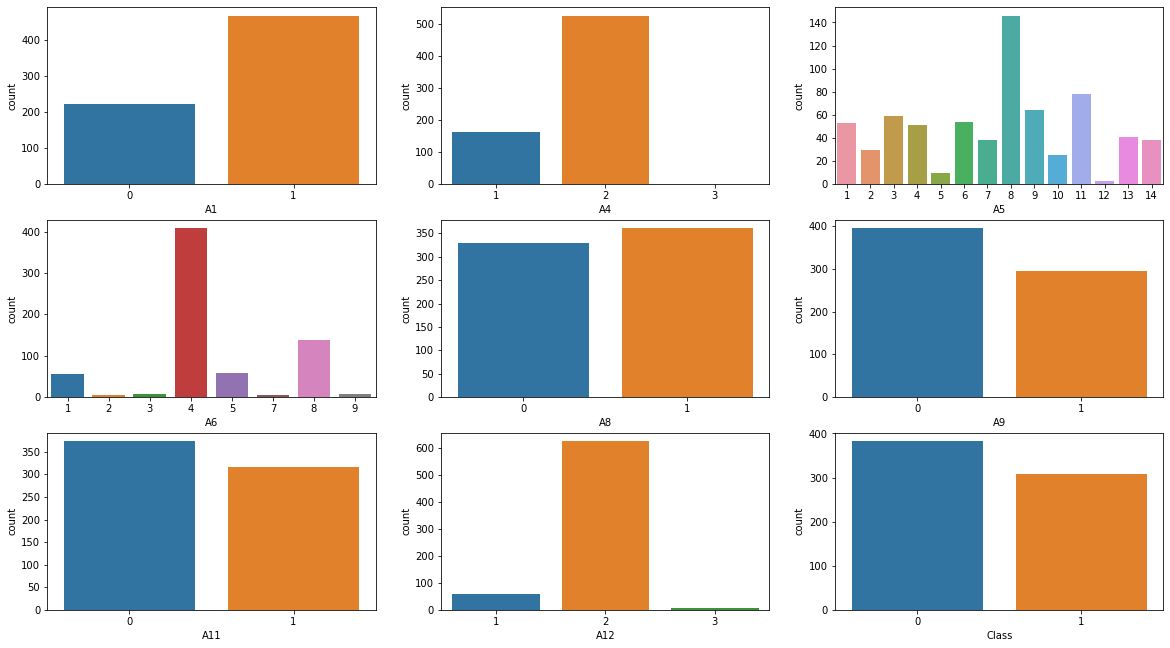

In [11]:
bar_charts(df)

* In A1 and A12 column, one class is dominated by other class.

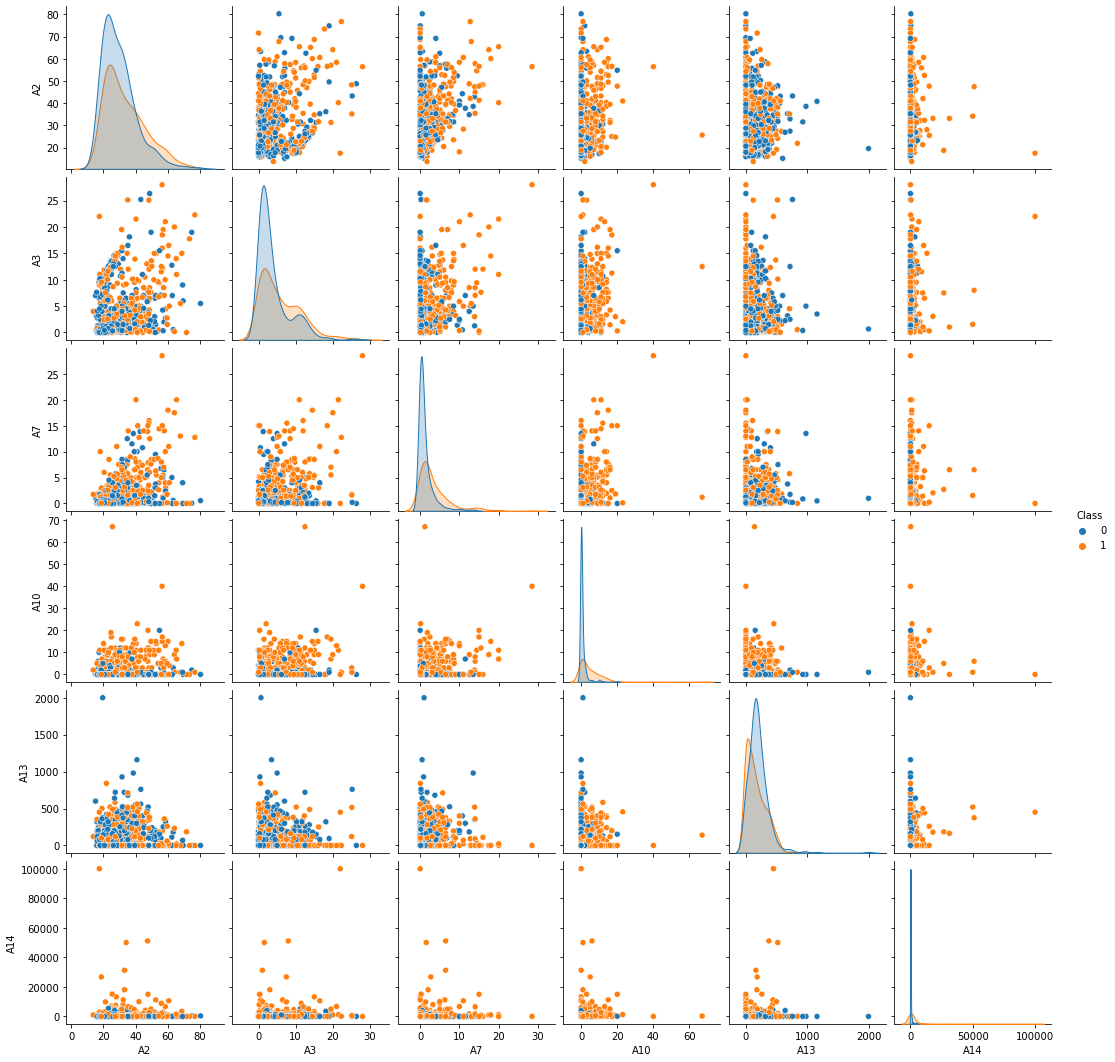

In [12]:
#Pairplot for continuous variable
sns.pairplot(df,hue='Class',diag_kind='kde')

In [13]:
#Checking the distribution of continuous variable
cols = df.select_dtypes(['int64','float64']).columns
def dist_plot(data):
    ncol = 3
    nrow = (len(cols)//ncol)+1
    plt.figure(figsize=(20,15))
    for col, n in zip(cols, np.arange(len(cols))):
        
        ax = plt.subplot(nrow, ncol, n+1)
        sns.histplot(data[col],kde=True)

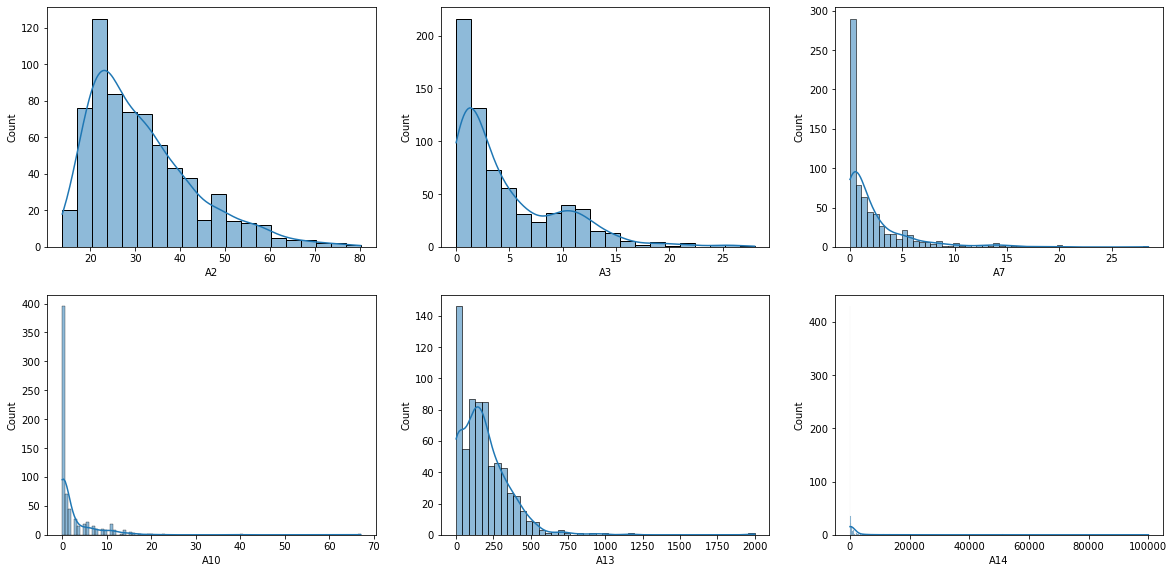

In [14]:
dist_plot(df)

* The distribution for all the continuous variable is right skewed.

In [15]:
#Boxplot to detect outlier
cols = df.select_dtypes(['int64','float64']).columns
def box_plot(data):
    ncol = 3
    nrow = (len(cols)//ncol)+1
    plt.figure(figsize=(20,15))
    for col, n in zip(cols, np.arange(len(cols))):
        
        ax = plt.subplot(nrow, ncol, n+1)
        sns.boxplot(y=data[col])

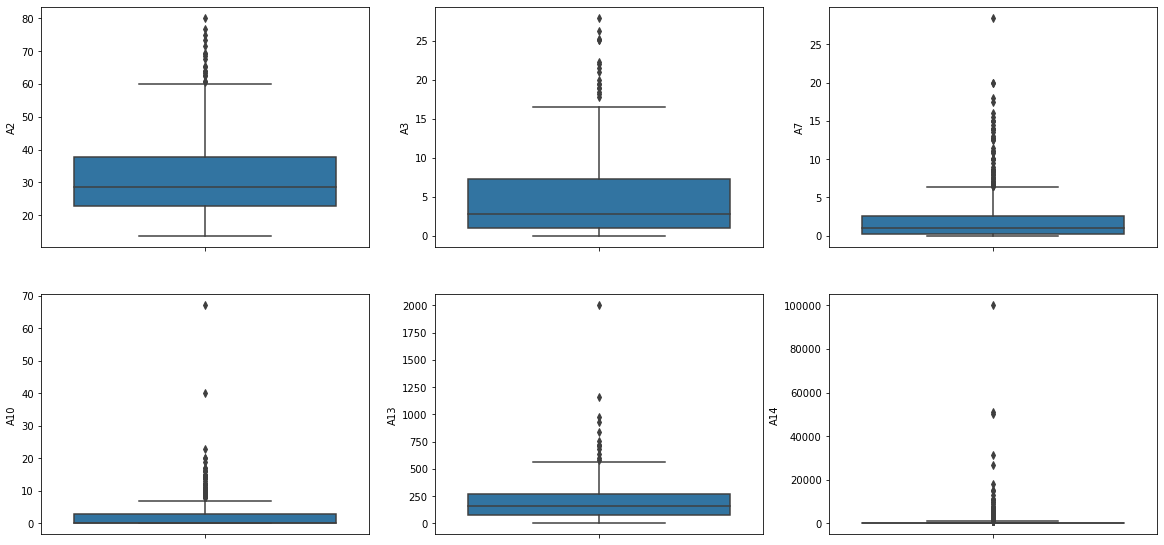

In [16]:
box_plot(df)

* We can see that there are lots of outlier in the dataset.

In [17]:
#Replacing the outlier with median
cols = df.select_dtypes(['int64','float64']).columns
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5*iqr)
    up = q3 + (1.5*iqr)
    df_out = df[col][(df[col] < low) | (df[col] > up)]
    outlier = len(df_out)
    print("Number of outlier in:",col,'is:',outlier)

Number of outlier in: A2 is: 18
Number of outlier in: A3 is: 17
Number of outlier in: A7 is: 63
Number of outlier in: A10 is: 79
Number of outlier in: A13 is: 13
Number of outlier in: A14 is: 113


* We can not input the outlier with mean, mode or median, as it increases the number of outlier further. So we will treat the outlier by scaling the variable.

<AxesSubplot:>

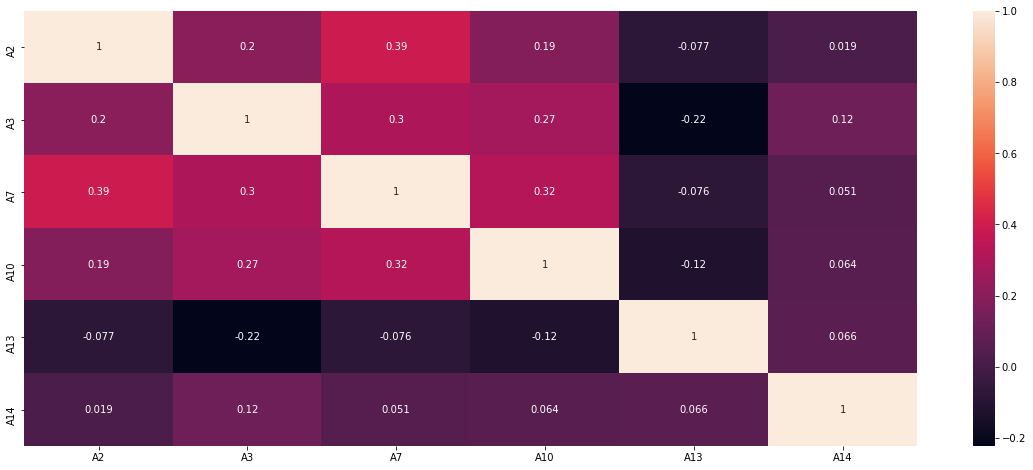

In [18]:
#Correlation matrix for the continuous variable
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

* There is a very weak correlation between the variables.

# Hypothesis Testing for continuous variable

Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable

H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable

Here we will use independent t test

In [19]:
#Defining the continuous columns
col = df.select_dtypes(['int64','float64']).columns

In [20]:
from scipy.stats import ttest_ind

In [21]:
#Independent t test
for c in col:
    x = np.array(df[c][df['Class']==0.0])
    y = np.array(df[c][df['Class']==1.0])
    t, p_value = ttest_ind(x,y,axis=0)
    print('p_value:',p_value)
    if p_value < 0.05:          #assuming significant level at 0.05
        print('There is a significant difference in',c, 'feature with different category of Class')
    else:
        print('There is no significant difference in',c, 'feature with different category of Class')

p_value: 1.9905786603284007e-05
There is a significant difference in A2 feature with different category of Class
p_value: 4.551680702308035e-08
There is a significant difference in A3 feature with different category of Class
p_value: 3.671053740159993e-18
There is a significant difference in A7 feature with different category of Class
p_value: 7.957718568079854e-29
There is a significant difference in A10 feature with different category of Class
p_value: 0.008591752438643524
There is a significant difference in A13 feature with different category of Class
p_value: 3.4520256956287804e-06
There is a significant difference in A14 feature with different category of Class


# Hypothesis Testing for Categorical Variable

Ho: There is no significant difference in independent feature for different category of target variable(Class)

H1: There is significant difference in independent feature for different category of target variable(Class)

Here we will us Chi Square test

In [22]:
from scipy.stats import chi2_contingency

In [23]:
#Defining the columns
col = df.select_dtypes('category').columns

In [24]:
#Chi Square Test
for c in col:
    crs_tab = pd.crosstab(df[c],df['Class'])
    chi,p_value,dof,expected=chi2_contingency(crs_tab)
    print('P value:', p_value)
    if p_value < 0.05:
        print('There is a significant difference in',c, 'feature for different category of target variable(Class)')
    else:
        print('There is no significant difference in',c, 'feature for different category of target variable(Class)')

P value: 0.7771359315082518
There is no significant difference in A1 feature for different category of target variable(Class)
P value: 1.5978512968629162e-06
There is a significant difference in A4 feature for different category of target variable(Class)
P value: 3.502987066102028e-15
There is a significant difference in A5 feature for different category of target variable(Class)
P value: 1.3561600776590557e-07
There is a significant difference in A6 feature for different category of target variable(Class)
P value: 3.1185900878457007e-79
There is a significant difference in A8 feature for different category of target variable(Class)
P value: 5.6757273745274924e-33
There is a significant difference in A9 feature for different category of target variable(Class)
P value: 0.45094587758631943
There is no significant difference in A11 feature for different category of target variable(Class)
P value: 0.010094291370456362
There is a significant difference in A12 feature for different category 

In [25]:
#Droping A1, A11 column
df = df.drop(['A1','A11'],axis=1)

# Data Preparation and Modeling

In [26]:
#Label Encoding the variable
col = ['A4','A5','A6','A12']
df = pd.get_dummies(df,columns=col)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#Separating feature and target variable
x = df.drop('Class',axis=1)
y = df['Class']

In [29]:
#Splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80,random_state=1)

In [30]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train_scaled = scl.fit_transform(x_train)
x_test_scaled = scl.transform(x_test)

# Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
#Building and training the model
log_model= LogisticRegression()
log_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [33]:
#prediction for testing set
log_model.predict(x_test_scaled)

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1], dtype=int64)

In [34]:
#Accuracy of training set
log_model.score(x_train_scaled,y_train)

0.8713768115942029

In [35]:
#Accuracy of testing set
log_model.score(x_test_scaled,y_test)

0.8840579710144928

# SVM

In [36]:
from sklearn.svm import SVC

In [37]:
#Building and training the model
svc_model= SVC()
svc_model.fit(x_train_scaled,y_train)

SVC()

In [38]:
#prediction for testing set
svc_model.predict(x_test_scaled)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1], dtype=int64)

In [39]:
#Accuracy of training set
svc_model.score(x_train_scaled,y_train)

0.9021739130434783

In [40]:
#Accuracy of testing set
svc_model.score(x_test_scaled,y_test)

0.9057971014492754

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
#Building and training the model
dtree_model= DecisionTreeClassifier()
dtree_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [43]:
#prediction for testing set
dtree_model.predict(x_test_scaled)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1], dtype=int64)

In [44]:
#Accuracy of training set
dtree_model.score(x_train_scaled,y_train)

1.0

In [45]:
#Accuracy of testing set
dtree_model.score(x_test_scaled,y_test)

0.8333333333333334

# Adaboost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
#Building and training the model
ada_model= AdaBoostClassifier()
ada_model.fit(x_train_scaled,y_train)

AdaBoostClassifier()

In [48]:
#prediction for testing set
ada_model.predict(x_test_scaled)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1], dtype=int64)

In [49]:
#Accuracy of training set
ada_model.score(x_train_scaled,y_train)

0.9094202898550725

In [50]:
#Accuracy of testing set
ada_model.score(x_test_scaled,y_test)

0.8695652173913043

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
#Building and training the model
rf_model= RandomForestClassifier()
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [53]:
#prediction for testing set
rf_model.predict(x_test_scaled)

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1], dtype=int64)

In [54]:
#Accuracy of training set
rf_model.score(x_train_scaled,y_train)

1.0

In [55]:
#Accuracy of testing set
rf_model.score(x_test_scaled,y_test)

0.8840579710144928

# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
#Building and training the model
knn_model= KNeighborsClassifier()
knn_model.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [58]:
#prediction for testing set
knn_model.predict(x_test_scaled)

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1], dtype=int64)

In [59]:
#Accuracy of training set
knn_model.score(x_train_scaled,y_train)

0.8260869565217391

In [60]:
#Accuracy of testing set
knn_model.score(x_test_scaled,y_test)

0.8043478260869565

# Comparing all the models

In [61]:
def get_metrics_score(model):
    
    score_list = []
    
    pred_train = model.predict(x_train_scaled)
    pred_test = model.predict(x_test_scaled)
    
    train_acc = round(model.score(x_train_scaled,y_train)*100,2)
    test_acc = round(model.score(x_test_scaled,y_test)*100,2)
    
    train_recall = round(metrics.recall_score(y_train,pred_train)*100,2)
    test_recall = round(metrics.recall_score(y_test,pred_test)*100,2)
    
    train_precision = round(metrics.precision_score(y_train,pred_train)*100,2)
    test_precision = round(metrics.precision_score(y_test,pred_test)*100,2)
    
    train_f1 = round(metrics.f1_score(y_train,pred_train)*100,2)
    test_f1 = round(metrics.f1_score(y_test,pred_test)*100,2)
    
    score_list.append([train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1])
    
    return score_list


In [62]:
from sklearn import metrics
#Defining the odels
models = [log_model, svc_model, knn_model,dtree_model,rf_model,ada_model]
#Creating empty list to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
#looping through the models
for mod in models:
    j = get_metrics_score(mod)
    acc_train.append((j[0][0]))
    acc_test.append((j[0][1]))
    recall_train.append((j[0][2]))
    recall_test.append((j[0][3]))
    precision_train.append((j[0][4]))
    precision_test.append((j[0][5]))
    f1_train.append((j[0][6]))
    f1_test.append((j[0][7]))

In [63]:
#Creating Dataframe
comparison_frame = pd.DataFrame({'Model':['log_model', 'svc_model', 'knn_model','dtree_model','rf_model','ada_model'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
1,svc_model,90.22,90.58,92.59,93.75,86.21,86.96,89.29,90.23
0,log_model,87.14,88.41,86.83,85.94,84.40,88.71,85.60,87.30
4,rf_model,100.00,88.41,100.00,82.81,100.00,91.38,100.00,86.89
5,ada_model,90.94,86.96,88.89,87.50,90.38,84.85,89.63,86.15
3,dtree_model,100.00,83.33,100.00,81.25,100.00,82.54,100.00,81.89
2,knn_model,82.61,80.43,75.72,81.25,83.26,77.61,79.31,79.39


* We can see that out of all the model svc_model performs well. We can go ahead with the model as there is no overfitting

# Classification Report for SVM model

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

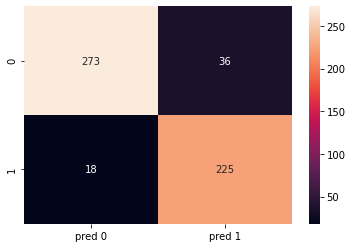

In [70]:
#Confusion matrix for training set
y_train_pred = svc_model.predict(x_train_scaled)
cm = pd.DataFrame(confusion_matrix(y_train,y_train_pred),columns=['pred 0','pred 1'])
sns.heatmap(cm,annot=True,fmt='0.4g')

<AxesSubplot:>

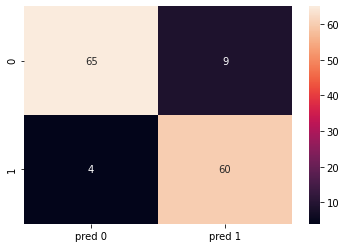

In [71]:
#Confusion matrix for training set
y_test_pred = svc_model.predict(x_test_scaled)
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['pred 0','pred 1'])
sns.heatmap(cm,annot=True,fmt='0.4g')

In [73]:
#Classification report for training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       309
           1       0.86      0.93      0.89       243

    accuracy                           0.90       552
   macro avg       0.90      0.90      0.90       552
weighted avg       0.90      0.90      0.90       552



In [76]:
#Classification report for testing set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        74
           1       0.87      0.94      0.90        64

    accuracy                           0.91       138
   macro avg       0.91      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138



* The model has training accuracy of 90% and testing accuracy of 91%.

In [77]:
#Saving the model
import pickle
filename = 'trained_model.sav'
pickle.dump(svc_model,open(filename,'wb'))

In [78]:
#Loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [80]:
#Saving the scaled model
filename1 = 'trained_model_scaled.sav'
pickle.dump(scl,open(filename1,'wb'))

In [81]:
#Loading the scaled model
loaded_model_scaled = pickle.load(open('trained_model_scaled.sav','rb'))

In [111]:
x_test.iloc[0]

A2         26.75
A3          4.50
A7          2.50
A8          0.00
A9          0.00
A10         0.00
A13       200.00
A14      1211.00
A4_1        1.00
A4_2        0.00
A4_3        0.00
A5_1        0.00
A5_2        0.00
A5_3        0.00
A5_4        0.00
A5_5        0.00
A5_6        0.00
A5_7        0.00
A5_8        1.00
A5_9        0.00
A5_10       0.00
A5_11       0.00
A5_12       0.00
A5_13       0.00
A5_14       0.00
A6_1        0.00
A6_2        0.00
A6_3        0.00
A6_4        0.00
A6_5        1.00
A6_7        0.00
A6_8        0.00
A6_9        0.00
A12_1       0.00
A12_2       1.00
A12_3       0.00
Name: 666, dtype: float64

In [110]:
y_test

666    0
520    1
681    0
23     0
65     1
      ..
17     1
180    0
259    0
345    1
45     1
Name: Class, Length: 138, dtype: category
Categories (2, int64): [0, 1]